In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore") 



In [11]:
hbc=pd.read_csv('haberman.csv')
print(hbc.shape)
print("################################")
print(hbc.head())
print("################################")
print(hbc.columns)


(306, 4)
################################
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
################################
Index(['age', 'year', 'nodes', 'status'], dtype='object')


<hr>
<div> 1.It has three features age,year,node and it has 306 datapoint and we have status for each datapoint 1 for survval 2 for dead</div><br>
<div>2. OBJECTIVE: to classify the patients on the basis of these three features whther they survived or not</div>
<hr>

In [12]:
hbc['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

<hr>
<div> so we can say that it is imbalanced dataset</div>
<hr>

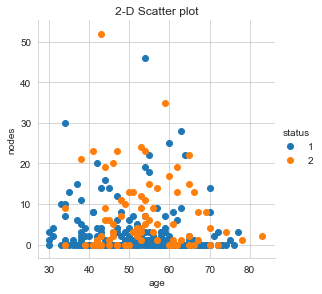

In [13]:
#### 2-d scatter plot

sns.set_style("whitegrid");
sns.FacetGrid(hbc, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter plot')

plt.show();


<div>Pair plots</div>

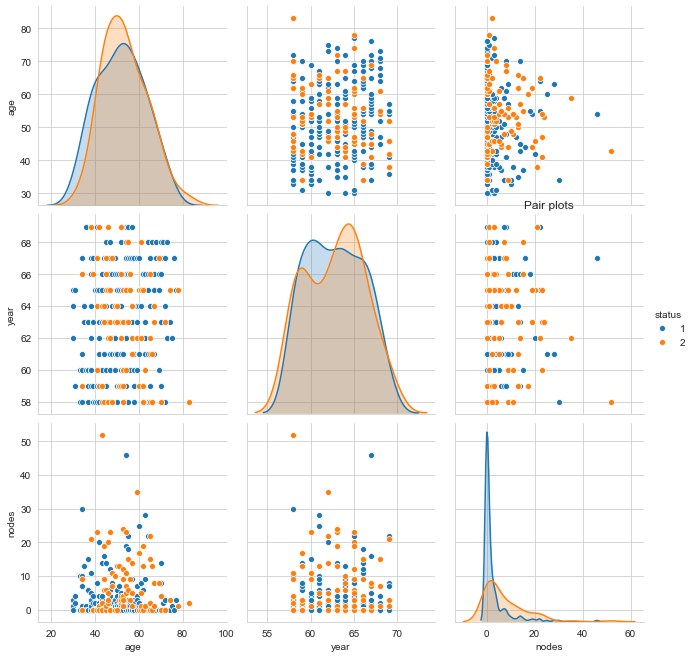

In [14]:
sns.set_style("whitegrid");
sns.pairplot(hbc, hue="status", size=3);
plt.title('Pair plots')

plt.show()



<hr>
<div>we can see all features  linearly non-separable </div>
<hr>

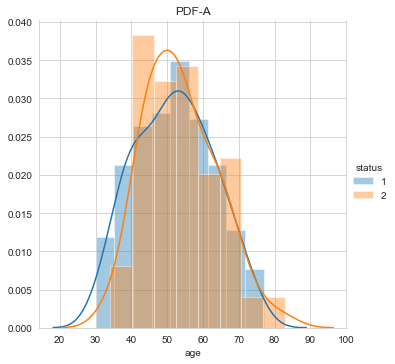

In [15]:
sns.FacetGrid(hbc, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF-A')

plt.show();


<div>have very high overlap age can not used in classification alone</div>

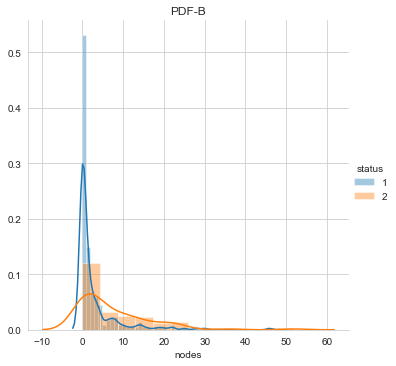

In [16]:
sns.FacetGrid(hbc, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('PDF-B')

plt.show();


<div> patient with  node nearer to zero have high chances of survival</div>
<div>it has less overlap in comparison to age and year</div>

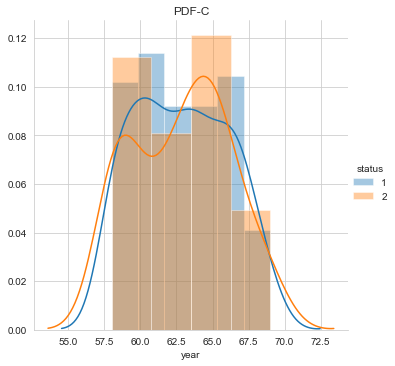

In [17]:
sns.FacetGrid(hbc, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('PDF-C')

plt.show();


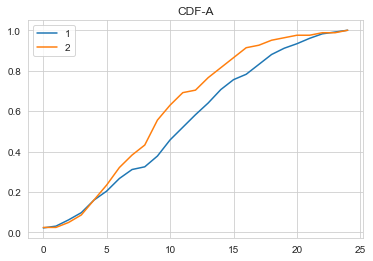

In [18]:
status_1=hbc[hbc['status'] == 1]
status_2=hbc[hbc['status'] == 2]

counts1, bin_edges1 = np.histogram(status_1['age'], bins=25, density=True )
counts2, bin_edges2 = np.histogram(status_2['age'], bins=25, density=True )

pdf1 = counts1/(sum(counts1))
pdf2 = counts2/(sum(counts2))

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)

plt.plot(cdf1,label="1")
plt.plot(cdf2,label="2")
plt.title('CDF-A')

plt.legend()



<div>80% of the patients have age less than about 16 who have survived<br>
80% of the patients have age less than about 13 who have not survived
</div>

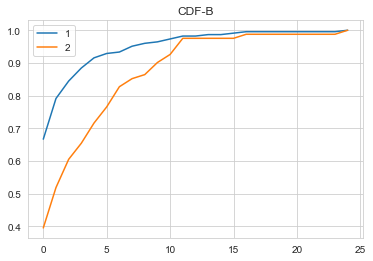

In [19]:


counts1, bin_edges1 = np.histogram(status_1['nodes'], bins=25, density=True )
counts2, bin_edges2 = np.histogram(status_2['nodes'], bins=25, density=True )

pdf1 = counts1/(sum(counts1))
pdf2 = counts2/(sum(counts2))

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)

plt.plot(cdf1,label="1")
plt.plot(cdf2,label="2")
plt.title('CDF-B')

plt.legend()



<div>90% of the patients have nodes less than 10</div>

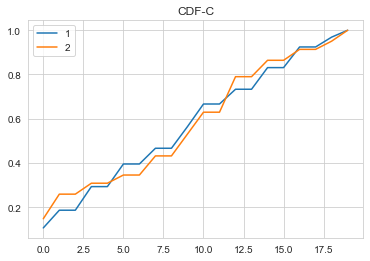

In [20]:


counts1, bin_edges1 = np.histogram(status_1['year'], bins=20, density=True )
counts2, bin_edges2 = np.histogram(status_2['year'], bins=20, density=True )

pdf1 = counts1/(sum(counts1))
pdf2 = counts2/(sum(counts2))

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)

plt.plot(cdf1,label="1")
plt.plot(cdf2,label="2")
plt.title('CDF-C')

plt.legend()



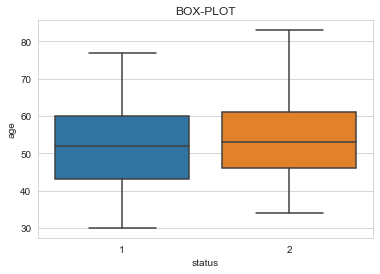

In [21]:
sns.boxplot(x='status',y='age', data=hbc)
plt.title('BOX-PLOT')

plt.show()

<div>patients which have age greater 76-77 are more likely not to survive<br>
patients which have age less than 35 are more likely to survive</div>

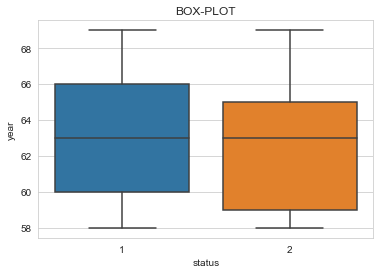

In [22]:
sns.boxplot(x='status',y='year', data=hbc)
plt.title('BOX-PLOT')

plt.show()

<div>highly overlap</div>

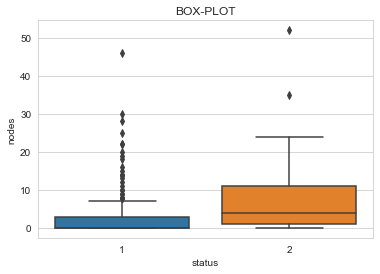

In [23]:
sns.boxplot(x='status',y='nodes', data=hbc)
plt.title('BOX-PLOT')

plt.show()

<div>patients having nodes greater than 8 are less likely to survive<br>
patients having less nodes are more likely to survive</div>

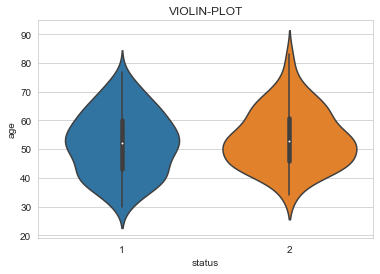

In [24]:
sns.violinplot(x="status", y="age", data=hbc, size=8)
plt.title('VIOLIN-PLOT')

plt.show()

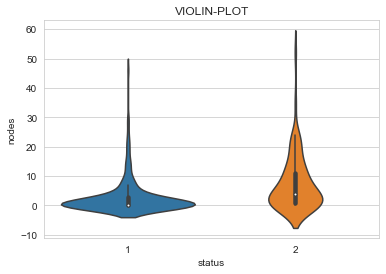

In [25]:
sns.violinplot(x="status", y="nodes", data=hbc, size=8)
plt.title('VIOLIN-PLOT')

plt.show()

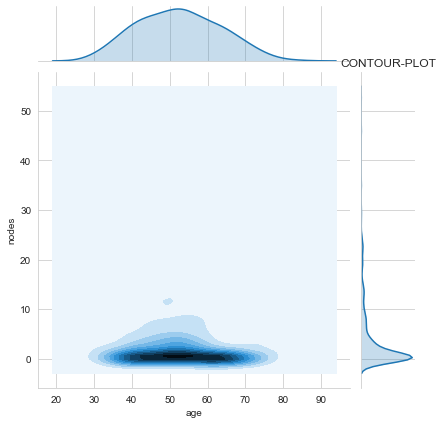

In [26]:
sns.jointplot(x="age", y="nodes", data=hbc, kind="kde");
plt.title('CONTOUR-PLOT')

plt.show();


<div>high no. of patients who's age lies between 40 to 55 have less nodes</div>

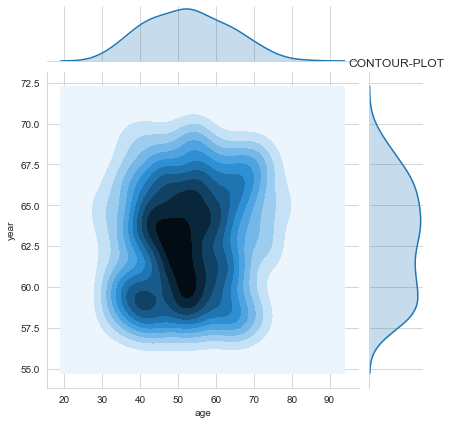

In [27]:
sns.jointplot(x="age", y="year", data=hbc, kind="kde");
plt.title('CONTOUR-PLOT')

plt.show();


<div>high no. of operation performed between 58 to 65 on patients of age greater than 55</div>

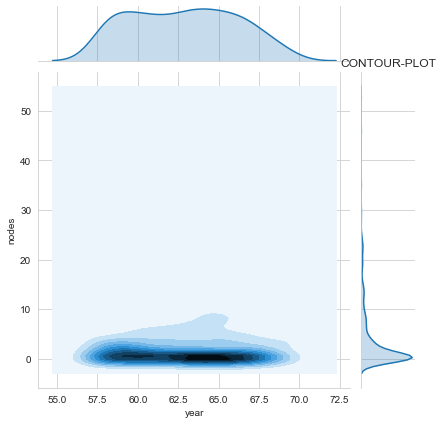

In [28]:
sns.jointplot(x="year", y="nodes", data=hbc, kind="kde");
plt.title('CONTOUR-PLOT')

plt.show();


<hr>
### Conclusions:

<div>1 patients having less nodes are likely to survive<br>
2 year is not very useful feature<br>
3 patients having age greater than 70 are less likely to survive</div>
<hr>